In [1]:
import numpy as np
import sys
import re
import os
import cygnus_lib as cy
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line, resize, rescale)
import scipy.ndimage
from skimage.transform import hough_circle, hough_circle_peaks
from scipy.stats import norm
import scipy.stats as stats

import pandas as pd
import pickle
import time
from IPython import display

%matplotlib inline
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
plt.rcParams['font.serif'] = ['Bitstream Vera Sans']
x_resolution = y_resolution = 2048
from itertools import combinations
import os
import requests
import ROOT
import root_numpy as rtnp
ROOT.gROOT.SetBatch(True)

Welcome to JupyROOT 6.15/01


In [4]:
dataSelection = 'LAB'
runI = [2316]
start_image_to_read = 0
max_image_to_read = 0
for nRi in range(0,len(runI)):
#############  mean and sigma file generator ############################
    try:
        print ('Download and open file: '+cy.swift_root_file(dataSelection, runI[nRi]))
        tmp_file = cy.swift_download_file(cy.swift_root_file(dataSelection, runI[nRi]))
        print ('Open file: '+tmp_file)
        f  = ROOT.TFile.Open(tmp_file);
        print ('Find Keys: '+str(len(f.GetListOfKeys())))
        pic, wfm = cy.root_TH2_name(f)
        max_image = len(pic)
        max_wfm = len(wfm)
        print ("# of Images (TH2) Files: %d " % (max_image))
        print ("# of Waveform (TH2) Files: %d " % (max_wfm))
        nImag=max_image
    
    except:
        print ("ERROR: No file %d" % (runI[nRi]))
        break
    if max_image_to_read != 0:
        nImag = max_image_to_read   
    print ("WARNING: data will be anlyzed from %d to %d" % (start_image_to_read, nImag))
    
    m_image = np.zeros((x_resolution, y_resolution), dtype=np.float64)
    s_image = np.zeros((x_resolution, y_resolution), dtype=np.float64)

    n0 = 0
    for iTr in range(start_image_to_read, nImag):

        if iTr % 150 == 0:
            print (iTr, ' >> Close and re-Open: ', tmp_file)
            f.Close()
            f  = ROOT.TFile.Open(tmp_file);

        image = rtnp.hist2array(f.Get(pic[iTr])).T
        m_image += image
        s_image += image**2 
        if n0 > 0:  # print progress and debung info for poit 200, 200...
            print ("Image[200,200]: %d => %.2f %.2f %.2f " % (iTr,
                                             image[200,200],
                                             np.sqrt((s_image[200,200] - 
                                                     m_image[200,200]**2 
                                                      / (n0+1)) / n0),
                                             m_image[200,200]/(n0+1),
                                             ))
        n0 += 1
    m_image = m_image/n0
    s_image = np.sqrt((s_image - m_image**2 * n0) / (n0 - 1))
    
###### print Info and Save OutPut ######################################
    
    print ("sigma %f" % (s_image[200,200]))
    fileoutm = ("./data/run%d_mean.h5" % (runI[nRi]))
    cy.write_image_h5(fileoutm, m_image)
    fileouts = ("./data/run%d_sigma.h5" % (runI[nRi]))
    cy.write_image_h5(fileouts, s_image)
    print("DONE OUTPUT on files: %s, %s", (fileoutm, fileouts))
    if not cy.rm_file(tmp_file):
        print (">> File "+tmp_file+" removed")

Download and open file: https://swift.cloud.infn.it:8080/v1/AUTH_1e60fe39fba04701aa5ffc0b97871ed8/Cygnus/Data/LAB/histograms_Run02316.root


  0.1%    4898816 / 3760311043

  0.3%   11108352 / 3760311043

  0.5%   17178624 / 3760311043

  0.6%   23470080 / 3760311043

  0.8%   29679616 / 3760311043

  1.0%   36143104 / 3760311043

  1.1%   42336256 / 3760311043

  1.3%   48472064 / 3760311043

  1.5%   54845440 / 3760311043

  1.6%   61169664 / 3760311043

  1.7%   63438848 / 3760311043

100.0% 3760316416 / 3760311043


Open file: ./tmp.26057.root
Find Keys: 2006
# of Images (TH2) Files: 1003 
# of Waveform (TH2) Files: 1003 
0  >> Close and re-Open:  ./tmp.26057.root
Image[200,200]: 1 => 98.00 1.41 99.00 
Image[200,200]: 2 => 98.00 1.15 98.67 
Image[200,200]: 3 => 97.00 1.26 98.25 
Image[200,200]: 4 => 100.00 1.34 98.60 
Image[200,200]: 5 => 97.00 1.37 98.33 
Image[200,200]: 6 => 100.00 1.40 98.57 
Image[200,200]: 7 => 100.00 1.39 98.75 
Image[200,200]: 8 => 101.00 1.50 99.00 
Image[200,200]: 9 => 98.00 1.45 98.90 
Image[200,200]: 10 => 100.00 1.41 99.00 
Image[200,200]: 11 => 97.00 1.47 98.83 
Image[200,200]: 12 => 98.00 1.42 98.77 
Image[200,200]: 13 => 97.00 1.45 98.64 
Image[200,200]: 14 => 97.00 1.46 98.53 
Image[200,200]: 15 => 96.00 1.54 98.38 
Image[200,200]: 16 => 106.00 2.38 98.82 
Image[200,200]: 17 => 97.00 2.35 98.72 
Image[200,200]: 18 => 103.00 2.48 98.95 
Image[200,200]: 19 => 100.00 2.43 99.00 
Image[200,200]: 20 => 100.00 2.38 99.05 
Image[200,200]: 21 => 101.00 2.36 99.14 
Image[20

Image[200,200]: 199 => 100.00 5.72 99.49 
Image[200,200]: 200 => 98.00 5.71 99.48 
Image[200,200]: 201 => 96.00 5.70 99.47 
Image[200,200]: 202 => 93.00 5.70 99.43 
Image[200,200]: 203 => 96.00 5.69 99.42 
Image[200,200]: 204 => 97.00 5.68 99.40 
Image[200,200]: 205 => 100.00 5.67 99.41 
Image[200,200]: 206 => 97.00 5.66 99.40 
Image[200,200]: 207 => 97.00 5.65 99.38 
Image[200,200]: 208 => 100.00 5.63 99.39 
Image[200,200]: 209 => 121.00 5.81 99.49 
Image[200,200]: 210 => 107.00 5.82 99.53 
Image[200,200]: 211 => 100.00 5.81 99.53 
Image[200,200]: 212 => 120.00 5.96 99.62 
Image[200,200]: 213 => 97.00 5.95 99.61 
Image[200,200]: 214 => 101.00 5.94 99.62 
Image[200,200]: 215 => 124.00 6.15 99.73 
Image[200,200]: 216 => 98.00 6.14 99.72 
Image[200,200]: 217 => 98.00 6.13 99.72 
Image[200,200]: 218 => 101.00 6.11 99.72 
Image[200,200]: 219 => 97.00 6.10 99.71 
Image[200,200]: 220 => 120.00 6.24 99.80 
Image[200,200]: 221 => 101.00 6.23 99.81 
Image[200,200]: 222 => 98.00 6.21 99.80 
Imag

Image[200,200]: 394 => 97.00 7.13 100.70 
Image[200,200]: 395 => 112.00 7.14 100.73 
Image[200,200]: 396 => 100.00 7.13 100.73 
Image[200,200]: 397 => 101.00 7.13 100.73 
Image[200,200]: 398 => 106.00 7.12 100.74 
Image[200,200]: 399 => 100.00 7.11 100.74 
Image[200,200]: 400 => 120.00 7.17 100.79 
Image[200,200]: 401 => 98.00 7.16 100.78 
Image[200,200]: 402 => 98.00 7.15 100.78 
Image[200,200]: 403 => 96.00 7.15 100.76 
Image[200,200]: 404 => 112.00 7.16 100.79 
Image[200,200]: 405 => 121.00 7.22 100.84 
Image[200,200]: 406 => 100.00 7.21 100.84 
Image[200,200]: 407 => 100.00 7.21 100.84 
Image[200,200]: 408 => 98.00 7.20 100.83 
Image[200,200]: 409 => 98.00 7.19 100.82 
Image[200,200]: 410 => 97.00 7.18 100.82 
Image[200,200]: 411 => 98.00 7.18 100.81 
Image[200,200]: 412 => 100.00 7.17 100.81 
Image[200,200]: 413 => 100.00 7.16 100.80 
Image[200,200]: 414 => 97.00 7.15 100.80 
Image[200,200]: 415 => 105.00 7.15 100.81 
Image[200,200]: 416 => 100.00 7.14 100.80 
Image[200,200]: 417 

Image[200,200]: 588 => 97.00 7.31 101.03 
Image[200,200]: 589 => 98.00 7.30 101.02 
Image[200,200]: 590 => 117.00 7.32 101.05 
Image[200,200]: 591 => 101.00 7.32 101.05 
Image[200,200]: 592 => 102.00 7.31 101.05 
Image[200,200]: 593 => 100.00 7.31 101.05 
Image[200,200]: 594 => 100.00 7.30 101.05 
Image[200,200]: 595 => 117.00 7.32 101.08 
Image[200,200]: 596 => 100.00 7.32 101.07 
Image[200,200]: 597 => 98.00 7.31 101.07 
Image[200,200]: 598 => 96.00 7.31 101.06 
Image[200,200]: 599 => 97.00 7.30 101.05 
600  >> Close and re-Open:  ./tmp.26057.root
Image[200,200]: 600 => 97.00 7.30 101.05 
Image[200,200]: 601 => 97.00 7.30 101.04 
Image[200,200]: 602 => 98.00 7.29 101.03 
Image[200,200]: 603 => 100.00 7.28 101.03 
Image[200,200]: 604 => 96.00 7.28 101.02 
Image[200,200]: 605 => 98.00 7.28 101.02 
Image[200,200]: 606 => 121.00 7.32 101.05 
Image[200,200]: 607 => 124.00 7.37 101.09 
Image[200,200]: 608 => 96.00 7.37 101.08 
Image[200,200]: 609 => 100.00 7.36 101.08 
Image[200,200]: 610 

Image[200,200]: 779 => 100.00 7.40 101.37 
Image[200,200]: 780 => 97.00 7.40 101.37 
Image[200,200]: 781 => 97.00 7.40 101.36 
Image[200,200]: 782 => 97.00 7.40 101.36 
Image[200,200]: 783 => 100.00 7.39 101.35 
Image[200,200]: 784 => 100.00 7.39 101.35 
Image[200,200]: 785 => 98.00 7.38 101.35 
Image[200,200]: 786 => 96.00 7.38 101.34 
Image[200,200]: 787 => 97.00 7.38 101.34 
Image[200,200]: 788 => 97.00 7.37 101.33 
Image[200,200]: 789 => 98.00 7.37 101.33 
Image[200,200]: 790 => 97.00 7.37 101.32 
Image[200,200]: 791 => 115.00 7.38 101.34 
Image[200,200]: 792 => 117.00 7.40 101.36 
Image[200,200]: 793 => 96.00 7.39 101.35 
Image[200,200]: 794 => 96.00 7.39 101.34 
Image[200,200]: 795 => 115.00 7.40 101.36 
Image[200,200]: 796 => 97.00 7.40 101.36 
Image[200,200]: 797 => 100.00 7.39 101.35 
Image[200,200]: 798 => 96.00 7.39 101.35 
Image[200,200]: 799 => 96.00 7.39 101.34 
Image[200,200]: 800 => 101.00 7.39 101.34 
Image[200,200]: 801 => 100.00 7.38 101.34 
Image[200,200]: 802 => 98

Image[200,200]: 971 => 102.00 7.40 101.41 
Image[200,200]: 972 => 106.00 7.40 101.41 
Image[200,200]: 973 => 94.00 7.40 101.40 
Image[200,200]: 974 => 98.00 7.40 101.40 
Image[200,200]: 975 => 120.00 7.42 101.42 
Image[200,200]: 976 => 96.00 7.41 101.41 
Image[200,200]: 977 => 106.00 7.41 101.42 
Image[200,200]: 978 => 97.00 7.41 101.41 
Image[200,200]: 979 => 97.00 7.41 101.41 
Image[200,200]: 980 => 98.00 7.40 101.41 
Image[200,200]: 981 => 102.00 7.40 101.41 
Image[200,200]: 982 => 97.00 7.40 101.40 
Image[200,200]: 983 => 97.00 7.40 101.40 
Image[200,200]: 984 => 97.00 7.39 101.39 
Image[200,200]: 985 => 98.00 7.39 101.39 
Image[200,200]: 986 => 116.00 7.40 101.41 
Image[200,200]: 987 => 97.00 7.40 101.40 
Image[200,200]: 988 => 98.00 7.40 101.40 
Image[200,200]: 989 => 100.00 7.39 101.40 
Image[200,200]: 990 => 98.00 7.39 101.39 
Image[200,200]: 991 => 97.00 7.39 101.39 
Image[200,200]: 992 => 98.00 7.38 101.38 
Image[200,200]: 993 => 115.00 7.39 101.40 
Image[200,200]: 994 => 120

In [3]:
if not cy.rm_file(tmp_file):
        print (">> File "+tmp_file+" removed")

>> File ./tmp.26057.root removed


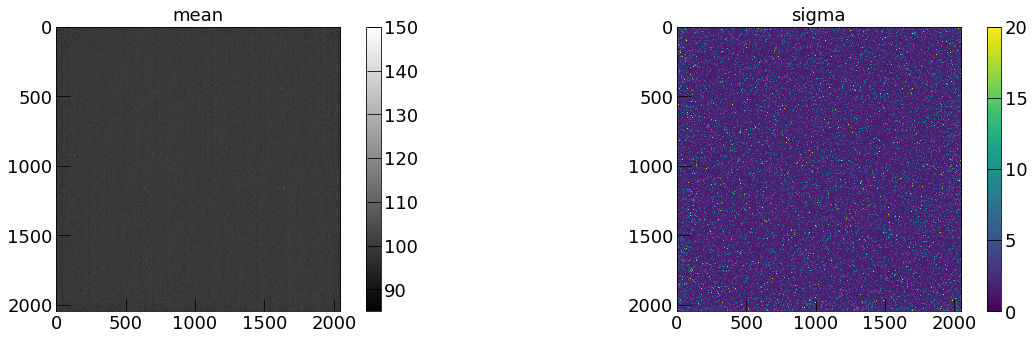

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


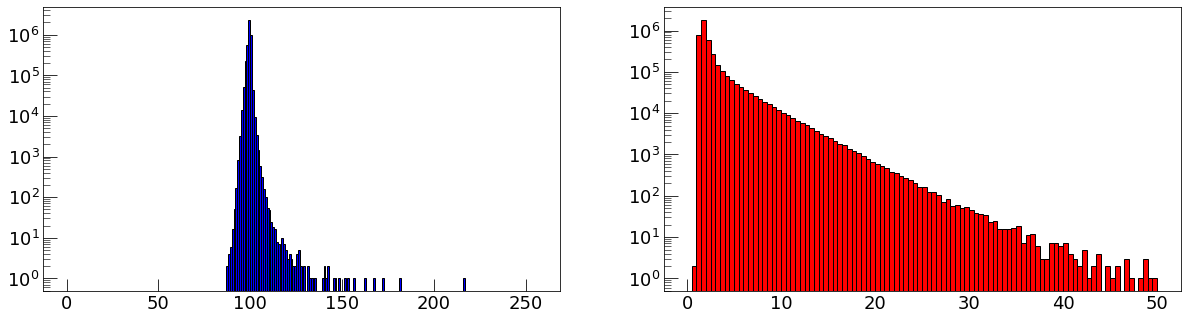

In [5]:
cy.set_atlas_style('long')
run = 2316
try:
    fileoutm = ("./data/run%d_mean.h5" % (run))
    imagem = cy.read_image_h5(fileoutm)
except:
    print ("No file for run %s, run script runs-pedestals.ipynb" % run)
try: 
    fileouts = ("./data/run%d_sigma.h5" % (run))
    images = cy.read_image_h5(fileouts)
except:
    print ("No file for run %s, run script runs-pedestals.ipynb" % run)


fig, ax = plt.subplots(1,2)
im = ax[0].imshow(imagem, cmap="gray", vmin=85,vmax=150)
fig.colorbar(im, ax=ax[0])
ax[0].set_title("mean")
ax[1].set_title("sigma")
im = ax[1].imshow(images, vmin=0,vmax=20)
fig.colorbar(im, ax=ax[1])
plt.show()
fig, ax = plt.subplots(1,2)
ax[0].hist(imagem.ravel(), bins=256, range=(0.0, 256.0), fc='b', ec='k')
ax[1].hist(images.ravel(), bins=100, range=(0.0, 50.0), fc='r', ec='k')
ax[0].set_yscale("log")
ax[1].set_yscale("log")

plt.show()